In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, 

In [3]:
df = pd.read_csv("cumulative.csv")
df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [5]:
df.isnull().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

In [6]:
df.koi_disposition.value_counts()

koi_disposition
FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: count, dtype: int64

In [7]:
df = df.drop(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_tce_delivname'], axis=1)

In [8]:
df_candidates = df[(df.koi_disposition == "CANDIDATE")]
df_candidates

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
37,CANDIDATE,CANDIDATE,1.000,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,...,-77.0,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263
58,CANDIDATE,CANDIDATE,0.999,0,0,0,0,40.419504,1.140000e-04,-1.140000e-04,...,-163.0,4.507,0.116,-0.105,0.781,0.116,-0.095,294.31686,50.080231,15.487
62,CANDIDATE,CANDIDATE,0.993,0,0,0,0,7.240661,1.620000e-05,-1.620000e-05,...,-79.0,4.595,0.012,-0.064,0.765,0.055,-0.028,293.83331,50.230350,15.334
63,CANDIDATE,CANDIDATE,0.871,0,0,0,0,3.435916,4.730000e-05,-4.730000e-05,...,-115.0,4.339,0.132,-0.108,1.087,0.157,-0.142,287.88733,46.276241,12.791
72,CANDIDATE,CANDIDATE,0.773,0,0,0,0,1.626630,1.020000e-06,-1.020000e-06,...,-172.0,4.410,0.124,-0.186,0.973,0.270,-0.145,294.36819,38.310280,15.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,CANDIDATE,CANDIDATE,0.532,0,0,0,0,4.736816,1.470000e-04,-1.470000e-04,...,-201.0,4.456,0.056,-0.224,1.011,0.329,-0.110,289.20331,44.505138,13.922
9551,CANDIDATE,CANDIDATE,0.386,0,0,0,0,130.235324,3.030000e-03,-3.030000e-03,...,-183.0,4.529,0.036,-0.192,0.903,0.251,-0.084,289.57452,44.519939,15.991
9557,CANDIDATE,CANDIDATE,1.000,0,0,0,0,8.870416,9.020000e-06,-9.020000e-06,...,-181.0,4.027,0.434,-0.186,1.514,0.426,-0.640,290.14914,50.239178,13.579
9558,CANDIDATE,CANDIDATE,1.000,0,0,0,0,47.109631,1.940000e-04,-1.940000e-04,...,-159.0,3.597,0.968,-0.242,2.780,1.089,-2.022,296.15601,44.920090,13.731


In [9]:
df1 = df[(df["koi_disposition"] != "CANDIDATE")]
df1

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9556,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,23.627035,2.260000e-04,-2.260000e-04,...,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375
9559,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.850000e-04,-1.850000e-04,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9562,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


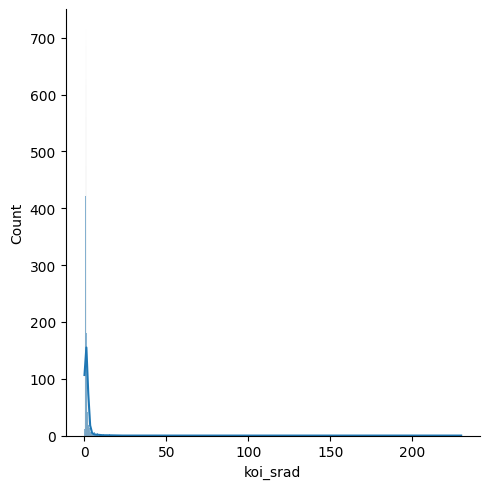

In [10]:
sns.displot(df.koi_srad, kde=True)

In [11]:
df1.koi_srad.describe()

count    7016.000000
mean        1.779288
std         6.203126
min         0.116000
25%         0.829000
50%         1.000000
75%         1.367000
max       229.908000
Name: koi_srad, dtype: float64

C:\Users\91909\AppData\Local\Temp\ipykernel_24212\3503721626.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_graphs[i], kde=True)
C:\Users\91909\AppData\Local\Temp\ipykernel_24212\3503721626.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_graphs[i], kde=True)
C:\Users\91909\AppData

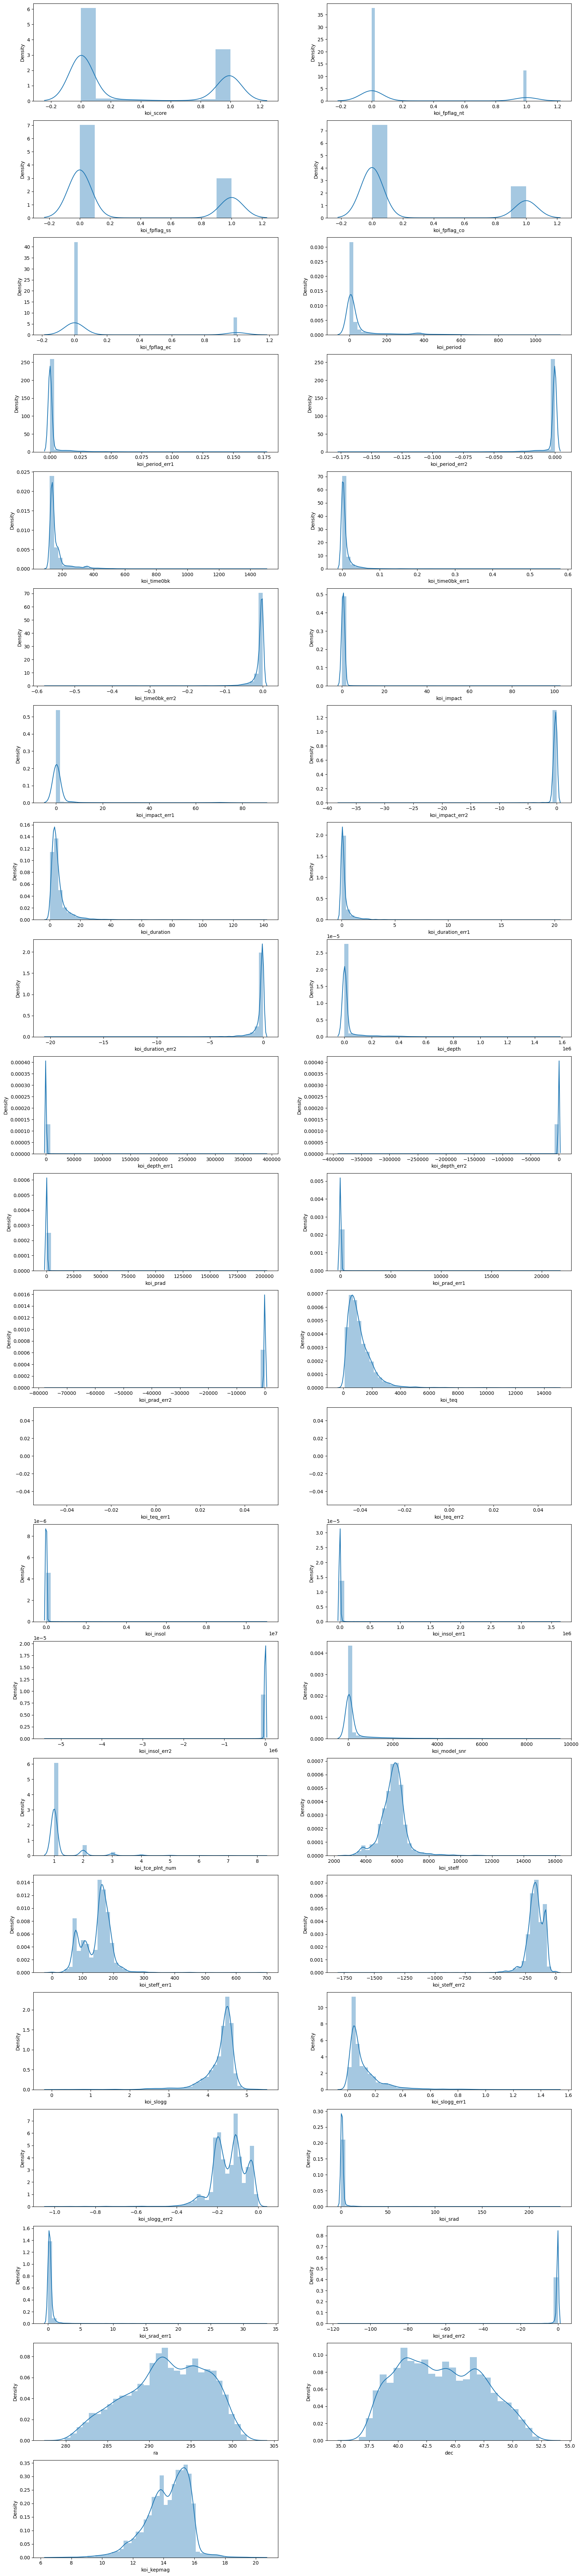

In [12]:
df_graphs = df1.drop(["koi_disposition", "koi_pdisposition"], axis=1)
plt.figure(figsize=(20, 100))
for (i, j) in zip(df_graphs.columns, range(1, len(df_graphs.columns)+1)):
        plt.subplot(23, 2, j)
        sns.distplot(df_graphs[i], kde=True)

In [13]:
df1 = df1.drop(["koi_teq_err1", "koi_teq_err2"], axis=1)

In [14]:
df.koi_tce_plnt_num.value_counts()

koi_tce_plnt_num
1.0    7745
2.0     972
3.0     326
4.0     111
5.0      41
6.0      14
7.0       8
8.0       1
Name: count, dtype: int64

In [15]:
df1.columns

Index(['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
       'dec', 'koi_kepmag'],
      dtype='object')

In [16]:
categorical_data = ["koi_disposition", "koi_pdisposition", "koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_tce_plnt_num"]

In [17]:
df1.isnull().mean()

koi_disposition      0.000000
koi_pdisposition     0.000000
koi_score            0.144751
koi_fpflag_nt        0.000000
koi_fpflag_ss        0.000000
koi_fpflag_co        0.000000
koi_fpflag_ec        0.000000
koi_period           0.000000
koi_period_err1      0.051531
koi_period_err2      0.051531
koi_time0bk          0.000000
koi_time0bk_err1     0.051531
koi_time0bk_err2     0.051531
koi_impact           0.041006
koi_impact_err1      0.051531
koi_impact_err2      0.051531
koi_duration         0.000000
koi_duration_err1    0.051531
koi_duration_err2    0.051531
koi_depth            0.041006
koi_depth_err1       0.051531
koi_depth_err2       0.051531
koi_prad             0.041006
koi_prad_err1        0.041006
koi_prad_err2        0.041006
koi_teq              0.041006
koi_insol            0.035402
koi_insol_err1       0.035402
koi_insol_err2       0.035402
koi_model_snr        0.041006
koi_tce_plnt_num     0.038136
koi_steff            0.041006
koi_steff_err1       0.054265
koi_steff_

In [18]:
len(df1.drop(categorical_data, axis=1).columns)

36

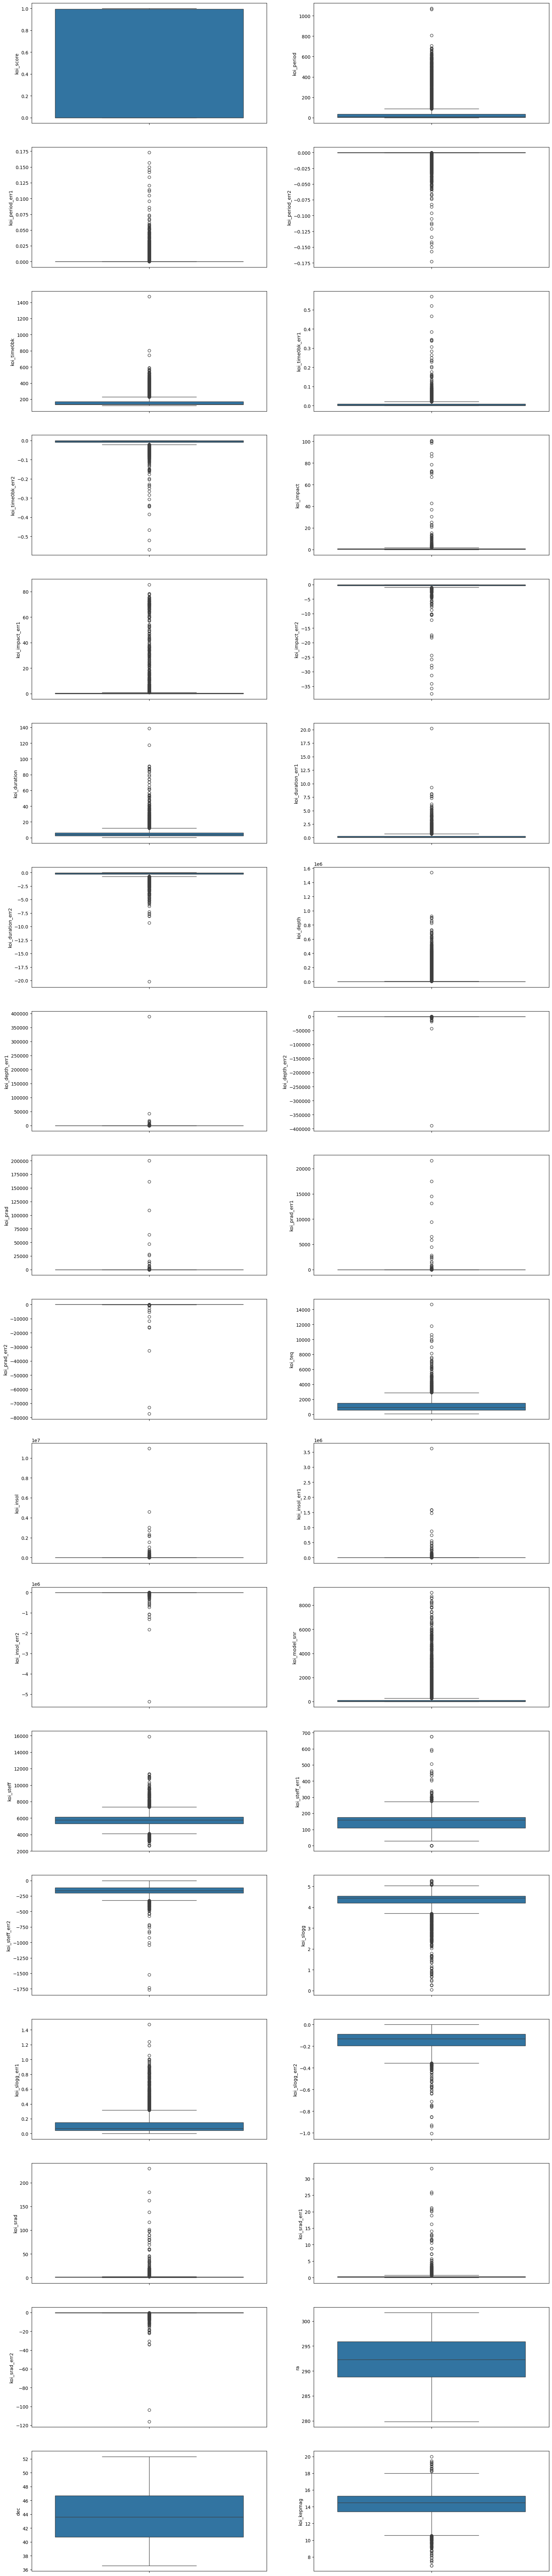

In [19]:
df_graphs2 = df1.drop(categorical_data, axis=1)

plt.figure(figsize=(20, 100))
for (i, j) in zip(df_graphs2.columns, range(1, len(df_graphs2.columns)+1)):
        plt.subplot(18, 2, j)
        sns.boxplot(df_graphs2[i])

In [20]:
df.koi_insol.describe()

count    9.243000e+03
mean     7.745737e+03
std      1.592047e+05
min      0.000000e+00
25%      2.015000e+01
50%      1.416000e+02
75%      8.702900e+02
max      1.094755e+07
Name: koi_insol, dtype: float64

In [21]:
print(len(df[(df.koi_kepmag < 12) | (df.koi_kepmag > 16)]))
print(len(df[(df.koi_srad > 120)]))
print(len(df[(df.koi_srad_err1 > 24)]))
print(len(df[(df.koi_srad_err2 < -30)]))
print(len(df[(df.koi_slogg_err1 > 1.1)]))

878
7
3
6
4


In [22]:
print(len(df[(df.koi_steff > 14000)]))
print(len(df[(df.koi_steff_err1 < 50) | (df.koi_steff_err1 > 500)]))
print(len(df[(df.koi_steff_err2 < -1250)]))
print(len(df[(df.koi_insol > 0.4e+07)]))
print(len(df[(df.koi_insol_err1 > 1.25e+06)]))
print(len(df[(df.koi_insol_err2 < -2e+06)]))

1
52
3
3
5
2


In [23]:
print(len(df[(df.koi_prad > 50000)]))
print(len(df[(df.koi_prad_err1 > 4000)]))
print(len(df[(df.koi_prad_err2 < -30000)]))
print(len(df[(df.koi_teq > 8000)]))

4
9
3
11


In [24]:
print(len(df[(df.koi_depth > 1.2e+06)]))
print(len(df[(df.koi_depth_err1 > 40000)]))
print(len(df[(df.koi_depth_err2 < -40000)]))
print(len(df[(df.koi_duration > 100)]))
print(len(df[(df.koi_duration_err1 > 12.5)]))
print(len(df[(df.koi_duration_err2 < -10)]))

1
2
2
2
2
5


In [25]:
print(len(df[(df.koi_impact > 60)]))
print(len(df[(df.koi_impact_err1 > 80)]))
print(len(df[(df.koi_impact_err2 < -20)]))
print(len(df[(df.koi_time0bk > 700)]))
print(len(df[(df.koi_time0bk_err1 > 0.4)]))
print(len(df[(df.koi_time0bk_err2 < -0.4)]))
print(len(df[(df.koi_period > 800)]))

14
1
9
4
7
7
12


In [30]:
df2 = (df1[(df1.koi_impact > 60)])
df2 = (df1[(df1.koi_impact_err1 < 80)])
df2 = (df1[(df1.koi_impact_err2 > -20)])
df2 = (df1[(df1.koi_time0bk < 700)])
df2 = (df1[(df1.koi_time0bk_err1 < 0.4)])
df2 = (df1[(df1.koi_time0bk_err2 > -0.4)])
df2 = (df1[(df1.koi_period < 800)])
df2 = (df1[(df1.koi_depth < 1.2e+06)])
df2 = (df1[(df1.koi_depth_err1 < 40000)])
df2 = (df1[(df1.koi_depth_err2 > -40000)])
df2 = (df1[(df1.koi_duration < 100)])
df2 = (df1[(df1.koi_duration_err1 < 12.5)])
df2 = (df1[(df1.koi_duration_err2 > -10)])
df2 = (df1[(df1.koi_prad < 50000)])
df2 = (df1[(df1.koi_prad_err1 < 4000)])
df2 = (df1[(df1.koi_prad_err2 > -30000)])
df2 = (df1[(df1.koi_teq < 8000)])
df2 = (df1[(df1.koi_steff_err2 > -1250)])
df2 = (df1[(df1.koi_insol < 0.4e+07)])
df2 = (df1[(df1.koi_insol_err1 < 1.25e+06)])
df2 = (df1[(df1.koi_insol_err2 > -2e+06)])
df2 = (df1[(df1.koi_steff < 14000)])
df2 = (df1[(df1.koi_srad < 120)])
df2 = (df1[(df1.koi_srad_err1 < 24)])
df2 = (df1[(df1.koi_srad_err2 > -30)])
df2 = (df1[(df1.koi_slogg_err1 < 1.1)])

df2

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9556,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,23.627035,2.260000e-04,-2.260000e-04,...,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375
9559,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.850000e-04,-1.850000e-04,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9562,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [28]:
x_train, x_test, y_train, y_test = train_test_split(df1.drop("koi_disposition", axis=1), df1.koi_disposition, test_size=0.3, random_state=42)